# Problem Statement No. 15

## Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. Perform following operations on this dataset.
### (I) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)
### (II) Convert the review text into lowercase.
### (III) Remove all punctuations from review text.
### (IV) Remove emoticons and emojis from the text
### (V) Tokenize the review text into words.
### (VI) Remove the Stopwords from the tokenized text.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Alexa.csv')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(3149, 5)

### (I) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

<Axes: xlabel='feedback', ylabel='count'>

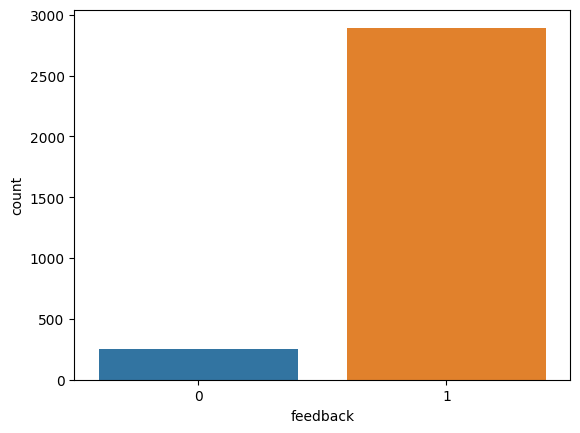

In [8]:
sns.countplot(df, x = 'feedback')

### (II) Convert the review text into lowercase

In [9]:
df['cleaned_text'] = df['verified_reviews'].apply(lambda x: x.lower())

In [10]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


### (III) Remove all punctuations from review text.

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

In [13]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


### (IV) Remove emoticons and emojis from the text

In [14]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F1E0-\U0001F1FF"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',string)

In [15]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emoji(x))

In [16]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [17]:
df['cleaned_text'][2012]

'i was suppose to get the “free” lightbulb with purchase it did not come with echo upon reading more carefully it says to click a box to receive free bulb  of course i want the free bulb who wouldn’t just a sneaky way for them to get out of having to give so many “ free”  bulbs away disappointed  i have yet to set up my echo our first purchase on any alexia device debating if we want to keep it it did come quickly with my prime membership'

### (V) Tokenize the review text into words.

In [18]:
import nltk
from nltk.tokenize import word_tokenize
df['tokenized'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [19]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[perfect, for, kids, adults, and, everyone, in..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[listening, to, music, searching, locations, c..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[i, do, love, these, things, i, have, them, ru..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[only, complaint, i, have, is, that, the, soun..."


### (VI) Remove the Stopwords from the tokenized text.

In [20]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

In [21]:
df['tokenized'] = df['tokenized'].apply(lambda x: " ".join([i for i in x if i not in sw]))

In [22]:
df['tokenized'] = df['tokenized'].apply(lambda x: x.split())

In [23]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl..."
